<a href="https://colab.research.google.com/github/HSS107048212/Relatio/blob/main/Relatio_Japan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install sentence-transformers


In [11]:
import pandas as pd

file_path ="/content/Japan Indo-pacific.xlsx"
# Load the data from the first sheet
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows of the dataframe to understand its structure
df.head()


,country,time,sentence
0,Japan,2024,The realization of a “Free and Open Indo-Pacif...
1,Japan,2024,The stability and prosperity of ASEAN is extre...
2,Japan,2024,We will steadily implement the new vision for...
3,Japan,2024,"As for Japan-Australia-India-U.S.(Quad), in ch..."
4,Japan,2024,Based on the outcome of the Japan-U.S.-ROK Sum...


In [12]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# 清理数据，删除缺少句子的行
df_cleaned = df.dropna(subset=['sentence'])

# 加载预训练的SentenceTransformer模型
model = SentenceTransformer('all-MiniLM-L6-v2')

# 提取句子
sentences = df_cleaned['sentence'].tolist()

# 将句子转换为向量
sentence_vectors = model.encode(sentences)

# 计算余弦相似度
similarity_matrix = cosine_similarity(sentence_vectors)

# 使用KMeans进行聚类（3和4个聚类）
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(sentence_vectors)
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(sentence_vectors)

# 将聚类标签添加到原始数据框中
df_cleaned['cluster_3'] = kmeans_3.labels_
df_cleaned['cluster_4'] = kmeans_4.labels_


# 保存结果到Excel文件
df.to_excel('/content/clustering_results.xlsx', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-19c85632163d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster_3'] = kmeans_3.labels_
<ipython-input-12-19c85632163d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [13]:
df_cleaned

,country,time,sentence,cluster_3,cluster_4
0,Japan,2024,The realization of a “Free and Open Indo-Pacif...,2,1
1,Japan,2024,The stability and prosperity of ASEAN is extre...,2,1
2,Japan,2024,We will steadily implement the new vision for...,2,2
3,Japan,2024,"As for Japan-Australia-India-U.S.(Quad), in ch...",2,1
4,Japan,2024,Based on the outcome of the Japan-U.S.-ROK Sum...,1,3
...,...,...,...,...,...
1868,Japan,2007,"It is none other than Indian dancing, such as ...",2,0
1869,Japan,2007,The breathing of the dancers and the musician...,0,0
1870,Japan,2007,"Watching it, one can hardly help but think th...",0,0
1871,Japan,2007,"We, India and Japan, want to become partners w...",2,3


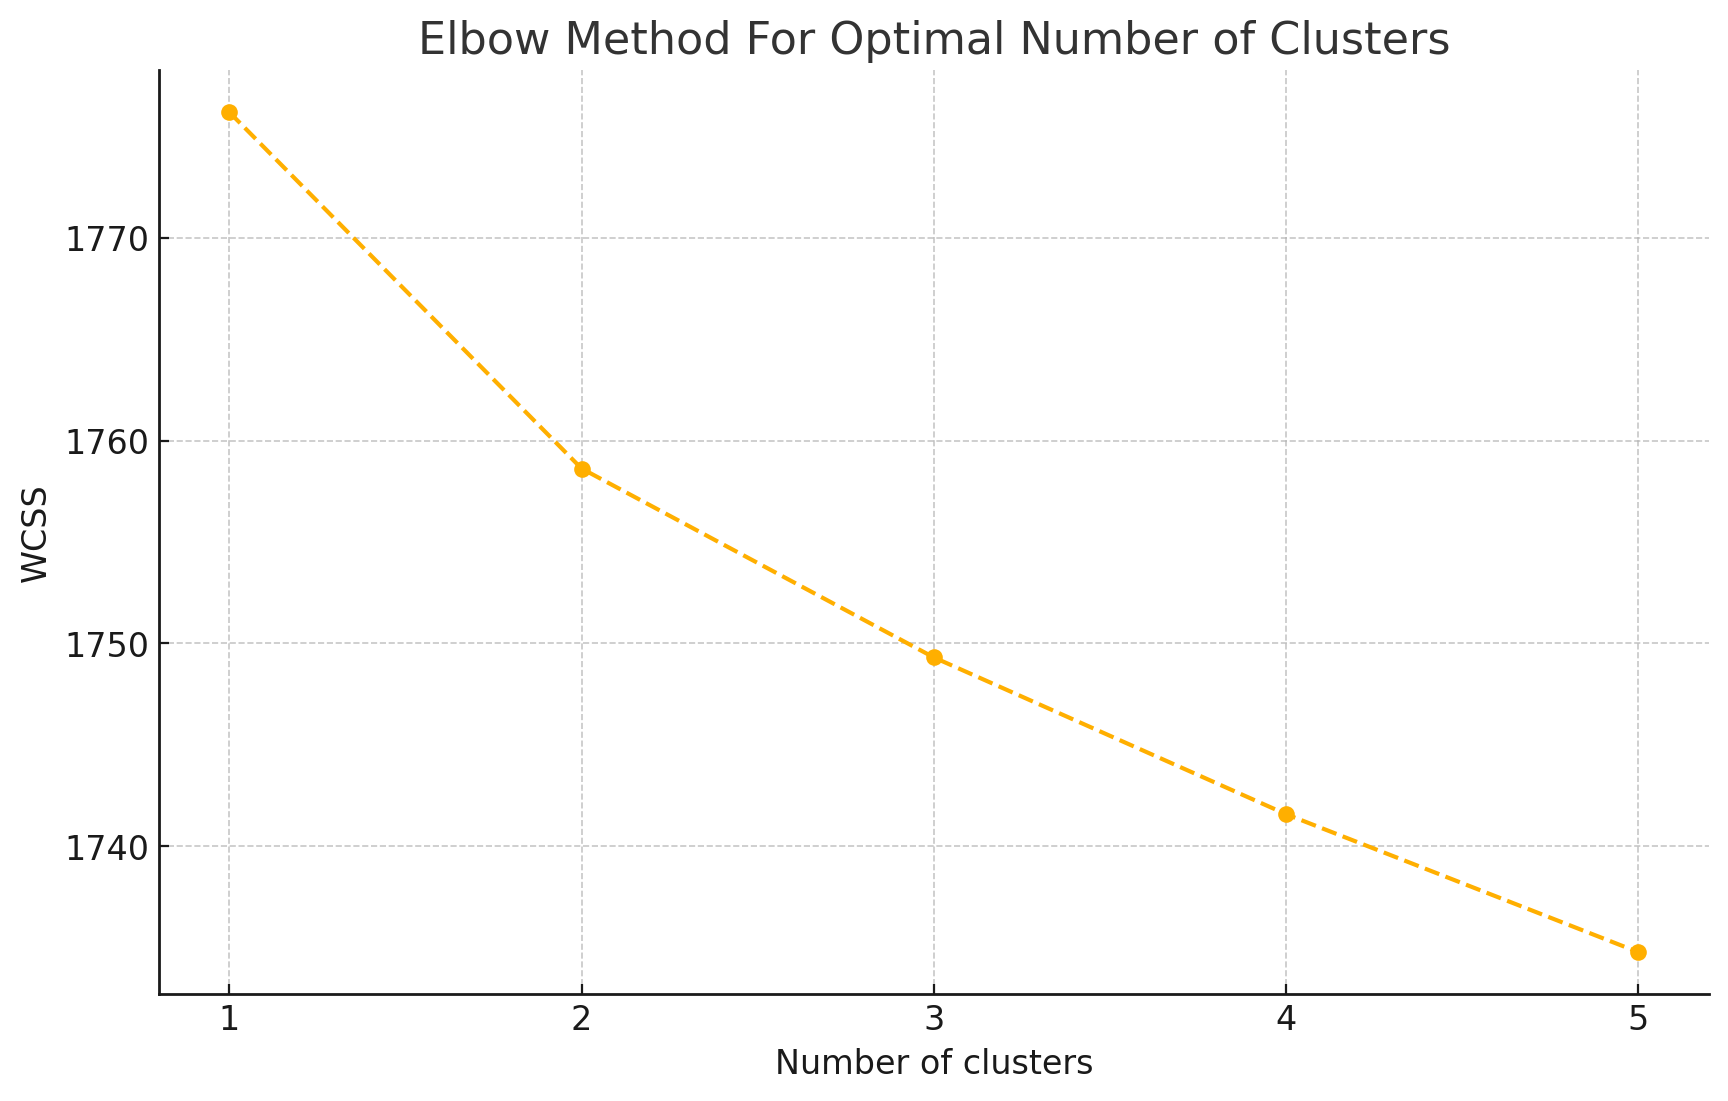